# Global AI Hub Proje | Adult Veri Seti



Github adresime [buradan](https://github.com/cemrebasak) ulaşabilirsiniz.

Projeyi gerçekleştirmek için faydalanmış olduğum [veri setinin adresi](https://www.kaggle.com/datasets/shreyshi/adultcsv).


# Veri Setinin Hazırlanması

### Veriyi anlama ve görselleştirme için gerekli kütüphanelerin yüklenmesi
Bu adımda, veri analizi ve görselleştirme işlemleri için gerekli olan kütüphaneler yüklenmiştir. `pandas` ve `numpy` veri işleme ve analizi için, `matplotlib` ve `seaborn` ise veriyi görselleştirmek için kullanılmıştır. Aşağıdaki kütüphaneler yüklenmiştir:
- **pandas**: Veri manipülasyonu ve analizi için kullanılır.
- **numpy**: Matematiksel işlemler ve sayısal hesaplamalar için gereklidir.
- **matplotlib**: Veri görselleştirmeleri için kullanılan temel kütüphanedir.
- **seaborn**: `matplotlib` üzerine inşa edilmiş olup, daha estetik ve anlamlı görselleştirmeler sağlar.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adultcsv/adult.csv


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

### Veri Setinin Yüklenmesi
Bu adımda, belirtilen dosya yolundan `adult.csv` adlı veri seti yüklenmiştir. `pd.read_csv()` fonksiyonu, CSV formatındaki dosyayı Pandas DataFrame'ine dönüştürür ve veriye Python üzerinden erişim sağlar. Bu veri seti, kişilerin demografik özellikleri ve gelir durumları hakkında bilgi içermektedir.


In [3]:
df = pd.read_csv('/kaggle/input/adultcsv/adult.csv')

### İlk 5 Satırın Görüntülenmesi
Bu adımda, `df.head()` fonksiyonu kullanılarak veri setinin ilk 5 satırı görüntülenmiştir. Bu yöntem, veri setinin yapısını hızlı bir şekilde incelemek ve verinin genel formatını anlamak için kullanılır. İlk 5 satırda yer alan sütunlar ve örnek veriler, veri setindeki değişkenlerin nasıl göründüğünü gösterir.


In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Veri Setinde Rastgele "NaN" Değerler Yaratma
Bu adımda, `add_random_missing_values` fonksiyonu kullanılarak veri setinde %2 oranında rastgele eksik (NaN) değerler yaratılmıştır. Bu fonksiyon, belirtilen `missing_rate` oranında veri setindeki hücrelere rastgele NaN değerleri ekler. 

In [5]:
import random

In [7]:
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    df_missing = dataframe.copy()

    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    if seed:
        random.seed(seed)

    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.02)

# Veriye İlk Bakış

### İlk 10 Satırın Görüntülenmesi
Bu adımda, `df.head()` fonksiyonu kullanılarak veri setinin ilk 10 satırı görüntülenmiştir. 


In [8]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,11th,NaN,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,NaN,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,NaN,40.0,United-States,>50K
4,18.0,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
5,34.0,Private,198693.0,NaN,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
6,29.0,?,227026.0,HS-grad,9.0,Never-married,NaN,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K
7,63.0,Self-emp-not-inc,104626.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,United-States,>50K
8,24.0,Private,369667.0,Some-college,10.0,Never-married,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
9,55.0,Private,104996.0,7th-8th,4.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,10.0,United-States,<=50K


### Veri Seti Sütun Adlarını Liste Olarak Alma
Bu kod, veri setinin tüm sütun adlarını bir listeye dönüştürerek `column_names` değişkenine atar. `df.columns` ile veri setindeki tüm sütun isimlerine erişilir ve `to_list()` fonksiyonu ile bu sütun adları bir liste formatına dönüştürülür. Bu işlem, veri setindeki sütun isimlerine kolayca erişmek ve manipüle etmek için kullanılır.


In [12]:
column_names=df.columns.to_list()
column_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

### Veri Seti Bilgilerini Görüntüleme
Bu kod, veri setinin temel bilgilerini (sütun sayısı, her sütundaki veri tipi, eksik değerlerin sayısı vb.) görüntülemek için kullanılır. `df.info()` fonksiyonu, veri setindeki her sütunun veri tipini, null (eksik) değerlerin sayısını ve her sütundaki toplam öğe sayısını gösterir. Bu işlem, veri setinin genel yapısını anlamak ve eksik değerleri analiz etmek için önemlidir.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              47895 non-null  float64
 1   workclass        47839 non-null  object 
 2   fnlwgt           47840 non-null  float64
 3   education        47890 non-null  object 
 4   educational-num  47907 non-null  float64
 5   marital-status   47876 non-null  object 
 6   occupation       47848 non-null  object 
 7   relationship     47887 non-null  object 
 8   race             47930 non-null  object 
 9   gender           47876 non-null  object 
 10  capital-gain     47862 non-null  float64
 11  capital-loss     47879 non-null  float64
 12  hours-per-week   47829 non-null  float64
 13  native-country   47883 non-null  object 
 14  income           47887 non-null  object 
dtypes: float64(6), object(9)
memory usage: 5.6+ MB


### Veri Setinin Boyutunu Görüntüleme
Bu kod, veri setinin satır (gözlem) ve sütun (değişken) sayısını gösterir. 


In [10]:
df.shape

(48842, 15)

### Kategorik Değişkenin Değer Sayımlarını Görüntüleme
Bu kod, `gender` sütunundaki her bir benzersiz değerin kaç kez tekrarlandığını gösterir. `df['gender'].value_counts()` fonksiyonu, `gender` değişkenindeki her kategori için frekans sayımlarını döndürür. Bu işlem, kategorik değişkenlerin dağılımını anlamak ve veri setindeki sınıf dengesizliklerini analiz etmek için kullanılmıştır.


In [16]:
df['gender'].value_counts()

gender
Male      31986
Female    15890
Name: count, dtype: int64

### Sayısal Değişkenlerin Özet İstatistiklerini Görüntüleme
Bu kod, veri setindeki sayısal sütunlar için özet istatistikleri (ortalama, standart sapma, minimum, maksimum, çeyrekler arası değerler vb.) görüntüler.  Bu işlem, sayısal verinin genel dağılımını ve özelliklerini anlamak için kullanılır.


#### Sayısal Değişkenler İçin Özet İstatistikler
Bu tablodan, veri setindeki sayısal değişkenlerin (age, fnlwgt, educational-num, capital-gain, capital-loss, hours-per-week) özet istatistiklerini görebiliriz. Örneğin:
- **Yaş (age)** değişkeni ortalama 38.64, 17 yaş ile 90 yaş arasında değişiyor.
- **Fnlwgt** değişkeninin değerleri oldukça büyük.
- **Educational-num** değişkeni 1 ile 16 arasında, genellikle düşük sayılarla yoğunlaşıyor.
- **Capital-gain** ve **capital-loss** değişkenlerinde çoğunlukla sıfır değerleri gözükmekte.
- **Hours-per-week** değişkeni ise genelde 40 saat civarına yoğunlaşıyor, maksimum değer ise 99 saat.



In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,47895.0,38.644806,13.705104,17.0,28.0,37.0,48.00,90.0
fnlwgt,47840.0,189631.821781,105317.093527,12285.0,117528.0,178309.5,237670.25,1490400.0
educational-num,47907.0,10.078673,2.571657,1.0,9.0,10.0,12.00,16.0
capital-gain,47862.0,1078.187497,7450.382097,0.0,0.0,0.0,0.00,99999.0
capital-loss,47879.0,87.565258,403.022535,0.0,0.0,0.0,0.00,4356.0
hours-per-week,47829.0,40.420226,12.389278,1.0,40.0,40.0,45.00,99.0


### Çalışma Durumuna Göre Dağılım
Bu kod satırı, `workclass`  sütunundaki her bir benzersiz değerin frekansını hesaplar. `value_counts()` fonksiyonu, her bir kategoriye ait kaç örnek bulunduğunu gösterir. workclass'a göre dağılım, hangi iş türlerinde daha fazla örnek bulunduğunu analiz etmek için kullanışlıdır. Veri setini daha anlamak için diğer değişkenlerde de kullanılabilir.


In [15]:
df['workclass'].value_counts()

workclass
Private             33200
Self-emp-not-inc     3777
Local-gov            3083
State-gov            1934
Self-emp-inc         1663
Federal-gov          1407
Without-pay            21
Never-worked           10
Name: count, dtype: int64

### Sayısal Değişkenlerin Seçimi
Bu kod satırı, veri setindeki tüm sayısal (tam sayı ve ondalıklı sayı) sütunları seçer. `select_dtypes()` fonksiyonu, belirtilen veri türlerine sahip sütunları filtreler ve `int64` ve `float64` veri türlerine sahip olanları seçer. Bu sayede sayısal veri içeren sütunların bir listesi oluşturulur. Çıktıda, sayısal sütunların isimleri listelenir, bu da daha sonraki analizlerde sayısal verilerle çalışırken referans olarak kullanılabilir.


In [17]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Sayısal sütunlar:", numerical_cols)

Sayısal sütunlar: Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


### Kategorik Değişkenlerin Seçimi
Bu kod satırı, veri setindeki kategorik nesne türündeki) sütunları seçer. `select_dtypes()` fonksiyonu, belirtilen veri türlerine sahip sütunları filtreler ve `object` veri türüne sahip olan sütunları seçer. Bu sayede kategorik veri içeren sütunların bir listesi oluşturulur. Çıktıda, kategorik sütunların isimleri listelenir, bu da daha sonraki analizlerde kategorik verilerle çalışırken referans olarak kullanılabilir.


In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Kategorik sütunlar:", categorical_cols)

Kategorik sütunlar: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


### Cinsiyet Bazında Haftalık Çalışma Saati Ortalamasının Hesaplanması
Bu kod satırı, veri setinde bulunan "gender" (cinsiyet) sütununa göre gruplama yapar ve her bir grup (erkek ve kadın) için "hours-per-week" (haftalık çalışma saati) sütununun ortalama değerini hesaplar. `groupby()` fonksiyonu, verileri belirli bir kategorik değişken (bu durumda "gender") etrafında gruplar ve ardından `mean()` fonksiyonu, her grup için ortalama değeri hesaplar. Bu işlem, cinsiyete göre haftalık çalışma saati ortalamalarını analiz etmek için kullanılır.

Çıktıyı incelediğimizde kadınların haftada ortalama 36.410690 saat, erkeklerin ise 42.400932 saat çalıştığı sonucuna ulaşabiliriz.


In [19]:
df.groupby("gender")["hours-per-week"].mean()

gender
Female    36.410690
Male      42.400932
Name: hours-per-week, dtype: float64

### Yüksek Gelir Grubu İçin Haftalık Çalışma Saati Ortalamasının Hesaplanması
Bu kod satırı, gelir seviyesi ">50K" (yani yıllık geliri 50.000'den fazla olan) olan bireylerin verilerini seçmek için `df[df['income']=='>50K']` filtresi kullanır ve ardından bu gruptaki bireylerin haftalık çalışma saati ortalamasını hesaplar. `mean()` fonksiyonu, yalnızca yüksek gelir grubundaki bireylerin "hours-per-week" (haftalık çalışma saati) değerlerinin ortalamasını döndürür.

Çıktı, yüksek gelir grubundaki bireylerin haftada ortalama 45.454042970491216 saat çalıştığınıgösterir.


In [21]:
df_rich=df[df['income']=='>50K']
print(df_rich['hours-per-week'].mean())


45.454042970491216


### Düşük Gelir Grubu İçin Haftalık Çalışma Saati Ortalamasının Hesaplanması
Bu kod satırı, gelir seviyesi "<=50K" (yani yıllık geliri 50.000'den az olan) olan bireylerin verilerini seçmek için `df.loc[df['income']=='<=50K']` filtresi kullanır ve ardından bu gruptaki bireylerin haftalık çalışma saati ortalamasını hesaplar. `mean()` fonksiyonu, düşük gelir grubundaki bireylerin "hours-per-week" (haftalık çalışma saati) değerlerinin ortalamasını döndürür.

Çıktı, düşük gelir grubundaki bireylerin haftada ortalama 38.85251415438085 saat çalıştığını gösterir.


In [22]:
df_poor=df.loc[df['income']=='<=50K']
df_poor['hours-per-week'].mean()

38.85251415438085

# Eksik Veri Analizi

### Eksik Verileri (NaN) İle Değiştirme
Bu kod, veri kümesinde eksik değerleri temsil eden `'?'` karakterlerini `np.NaN` (NumPy'nin NaN değerine) ile değiştirir. `inplace=True` parametresi, değişikliklerin doğrudan `df` DataFrame'ine uygulanmasını sağlar, yani yeni bir DataFrame oluşturulmaz.

Kodun amacı, veri setindeki `'?'` değerlerini eksik veri (NaN) olarak işaretleyip analiz için uygun hale getirmektir. Bu işlemden sonra `df.head()` fonksiyonu, ilk 5 satırı göstererek değişikliklerin doğru şekilde yapıldığını kontrol etmemize olanak tanır.


In [23]:
df.replace('?',np.NaN,inplace=True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,11th,NaN,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,NaN,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,NaN,40.0,United-States,>50K
4,18.0,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


### Eksik Değerlerin Sayısını Hesaplama
Bu kod, veri kümesindeki her sütun için eksik (NaN) değerlerin toplam sayısını hesaplar. `df.isnull()` fonksiyonu, her hücreyi kontrol eder ve eksik değerler için `True`, diğer hücreler için `False` döner. `.sum()` metodu ise bu `True` değerlerini toplar, yani her sütundaki eksik veri sayısını verir.

Bu işlem, veri setinde eksik verilerin hangi sütunlarda olduğunu ve kaç tane eksik değer olduğunu anlamamıza yardımcı olur.


In [24]:
df.isnull().sum()

age                 947
workclass          3747
fnlwgt             1002
education           952
educational-num     935
marital-status      966
occupation         3756
relationship        955
race                912
gender              966
capital-gain        980
capital-loss        963
hours-per-week     1013
native-country     1802
income              955
dtype: int64

### Eksik Olmayan Değerlerin Sayısını Hesaplama
Bu kod, veri kümesindeki her sütun için eksik olmayan (NaN olmayan) değerlerin toplam sayısını hesaplar. `df.notnull()` fonksiyonu, her hücreyi kontrol eder ve eksik olmayan değerler için `True`, eksik değerler için `False` döner. `.sum()` metodu ise bu `True` değerlerini toplar, yani her sütundaki eksik olmayan veri sayısını verir.

Bu işlem, veri setindeki her sütundaki geçerli verilerin sayısını belirlemek için kullanılır.


In [25]:
df.notnull().sum()

age                47895
workclass          45095
fnlwgt             47840
education          47890
educational-num    47907
marital-status     47876
occupation         45086
relationship       47887
race               47930
gender             47876
capital-gain       47862
capital-loss       47879
hours-per-week     47829
native-country     47040
income             47887
dtype: int64

### Eksik Verilerin Görselleştirilmesi
Bu kod, `missingno` kütüphanesini kullanarak veri setindeki eksik verileri görselleştirir. `mso.bar()` fonksiyonu, her sütun için eksik verilerin oranını çubuk grafik şeklinde sunar. 

- `df` parametresi, eksik veri analizi yapılacak veri setini belirtir.
- `figsize` parametresi, grafiğin boyutlarını (10x5) belirler.
- `fontsize` parametresi, grafik üzerindeki yazı tipi boyutunu 12 olarak ayarlar.

Bu görselleştirme, hangi sütunlarda ne kadar eksik veri olduğunu hızlıca görmemizi sağlar ve veri temizleme sürecinde hangi sütunlara odaklanmamız gerektiğini gösterir.


In [26]:
import missingno as mso

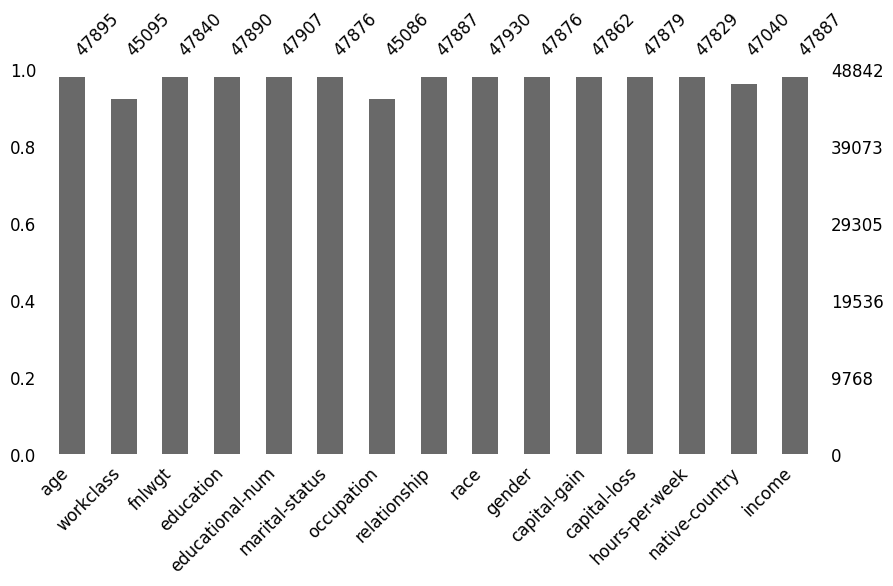

In [27]:
mso.bar(df = df,
         figsize = (10, 5),
         fontsize = 12);

### Eksik Verilerin Yüzde Olarak Hesaplanması
Bu kod, her sütundaki eksik verilerin toplam veri içindeki oranını belirler ve veri setinin eksik veri oranını hızlıca görmemizi sağlar.


In [28]:
df.isnull().sum()*100/df.shape[0]

age                1.938905
workclass          7.671676
fnlwgt             2.051513
education          1.949142
educational-num    1.914336
marital-status     1.977806
occupation         7.690103
relationship       1.955284
race               1.867245
gender             1.977806
capital-gain       2.006470
capital-loss       1.971664
hours-per-week     2.074035
native-country     3.689448
income             1.955284
dtype: float64

### 'education' Sütununun Veri Setinden Çıkarılması
Bu kod, veri setinde `'education num'` sütunu olduğu için `'education'` sütununu kaldırır. 

- `df.drop(columns='education', inplace=True)` komutu, `'education'` sütununu veri setinden tamamen siler. `inplace=True` parametresi, değişikliğin veri setine kalıcı olarak uygulanmasını sağlar. 

Sonrasında, `df.head(3)` komutu ile veri setinin ilk 3 satırı görüntülenir, böylece `'education'` sütununun başarılı bir şekilde kaldırıldığını doğrulamak mümkün olur.


In [31]:
df.drop(columns='education',inplace=True)
df.head(3)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,NaN,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,NaN,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K


### Eksik Değerlerin Doldurulması
Bu kod, veri setindeki eksik (`NaN`) değerleri uygun yöntemlerle doldurur. Her bir sütun türü için farklı bir doldurma stratejisi uygulanır:

- **Sayısal Değişkenler (int64 ve float64 türündeki sütunlar)**:
  - `capital-gain` ve `capital-loss` sütunları gibi aykırı değerler içerebilecek sütunlar için **medyan** değeri kullanılır.
  - Diğer sayısal sütunlar için ise **ortalama** değeri kullanılır.

- **Kategorik Değişkenler (object türündeki sütunlar)**:
  - Kategorik sütunlardaki eksik değerler, **mod** (en sık görülen değer) ile doldurulur.

Bu işlem, veri setindeki tüm eksik değerleri uygun şekilde doldurur ve modelleme için veri setini hazır hale getirir.


In [32]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  
        if col in ['capital-gain', 'capital-loss']:  # aykırı değer olabileceği için medyan daha güvenli
            df[col].fillna(df[col].median(), inplace=True)
        else: # sayısal değişkenler
            df[col].fillna(df[col].mean(), inplace=True)
    else:  # kategorik sütunlar
        df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipykernel_30/2148482184.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipykernel_30/2148482184.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [33]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.000000,10.078673,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.000000,9.000000,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,189631.821781,12.000000,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.000000,10.000000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,Private,103497.000000,10.000000,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


### Eksik Değerlerin Sayısının Kontrolü
Eksik veri sayısı kontrol edilir.


In [34]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Eksik Değerlerin Doldurulmasından Sonra Sayısal Veriler İçin Özet İstatistiklerin Görüntülenmesi
Yukarıda, veri setindeki eksik (NaN) değerlerin sayısını inceledik ve eksik verileri uygun yöntemlerle doldurduk. Şimdi, eksik değerlerin doldurulmasının ardından sayısal sütunlar için özet istatistikleri tekrar görüntüledik. Özet istatistiklere bakıldığında, eksik değerlerin doldurulmasının ardından herhangi bir büyük fark gözlemlenmemektedir. Bu da, eksik verilerin düzgün şekilde doldurulmuş ve veri setinin genel yapısında önemli bir değişiklik yaratılmadığını gösteriyor.


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.644806,13.571586,17.0,28.0,37.0,47.0,90.0
fnlwgt,48842.0,189631.821781,104231.176043,12285.0,118554.5,180465.0,235847.0,1490400.0
educational-num,48842.0,10.078673,2.546922,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1056.553990,7376.806414,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,85.838766,399.215209,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.420226,12.260123,1.0,40.0,40.0,45.0,99.0


# Aykırı Değer Analizi 

### Sayısal Değişkenler İçin Kutu Grafikleri (Boxplots) Görselleştirmesi
Bu adımda, sayısal değişkenler için aykırı değerleri (outliers) görselleştirmek amacıyla her bir sayısal sütun için kutu grafiği (boxplot) oluşturulmuştur. Kutu grafikleri, verinin dağılımını ve olası aykırı değerleri (üst ve alt sınırların dışında kalan noktalar) kolayca görselleştirebilmemizi sağlar. Her bir sayısal sütun için bu grafikler sırasıyla görüntülenmektedir. Bu sayede, sayısal değişkenlerin genel dağılımını ve olası anormallikleri inceleyebiliriz.


age


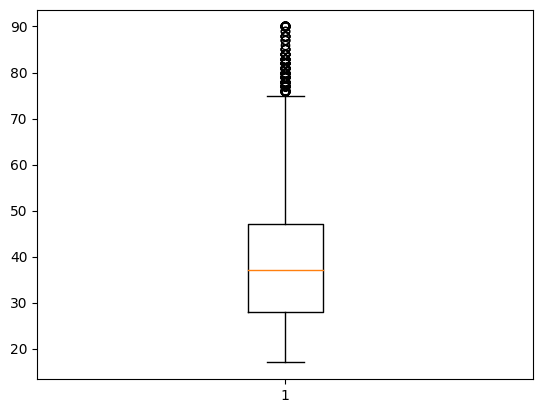

fnlwgt


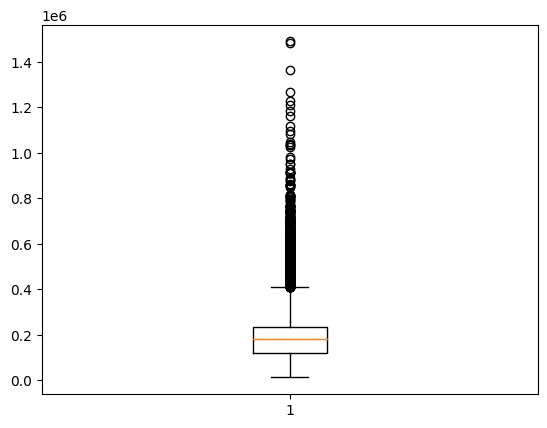

educational-num


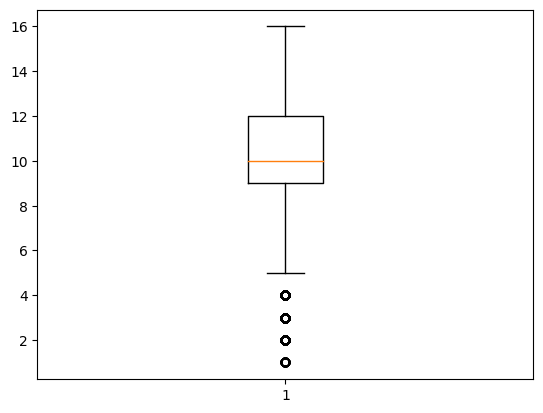

capital-gain


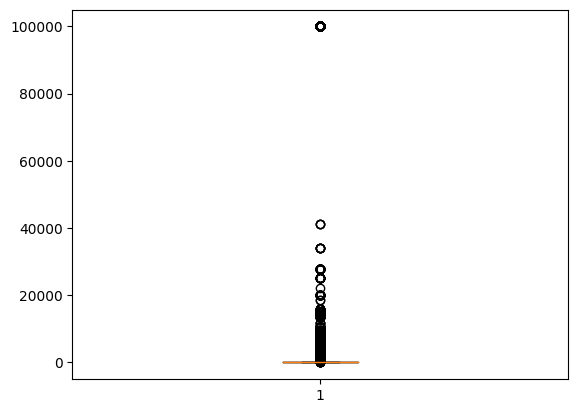

capital-loss


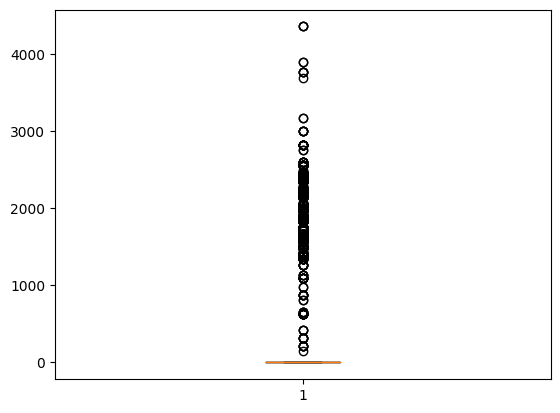

hours-per-week


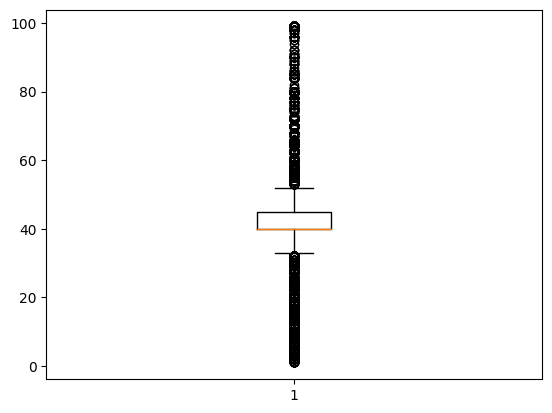

In [43]:
for column in numerical_cols:
  print(column)
  plt.boxplot(df[column])
  plt.show()

### Aykırı Değerlerin Düzeltilmesi ve Kutu Grafikleri (Boxplots) Görselleştirmesi
Bu adımda, sayısal değişkenlerdeki aykırı değerler (outliers) tespit edilip düzeltilmiştir. Aykırı değerler, IQR (Interquartile Range - Çeyrekler Arası Mesafe) yöntemine göre bulunarak, alt ve üst sınırların dışında kalan değerler, sırasıyla alt ve üst sınırlar ile değiştirilmiştir. Bu işlem, verinin daha sağlam ve güvenilir bir şekilde modellenmesine olanak sağlar.

Daha sonra, her sayısal sütun için kutu grafiği (boxplot) oluşturulmuştur. Bu grafikler, aykırı değerlerin düzeltilip düzeltilmediğini görselleştirmemizi sağlar ve verinin dağılımı hakkında bilgi verir. Kutu grafikleri her sütun için sırasıyla görüntülenmektedir.


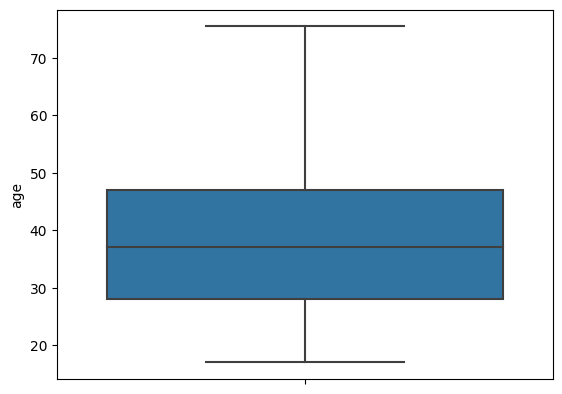

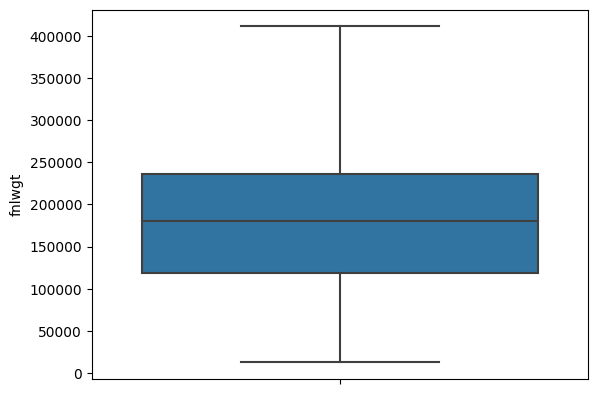

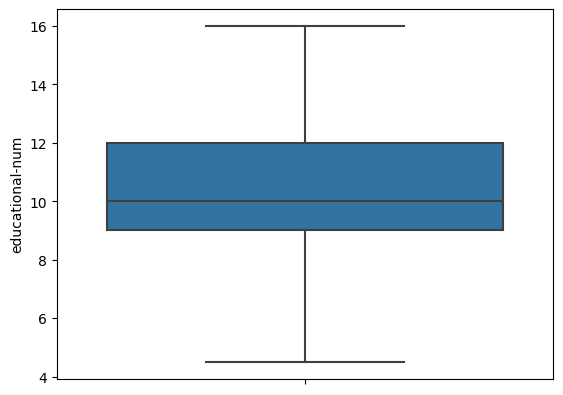

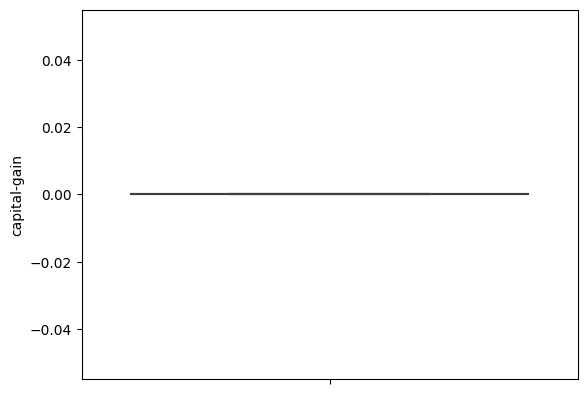

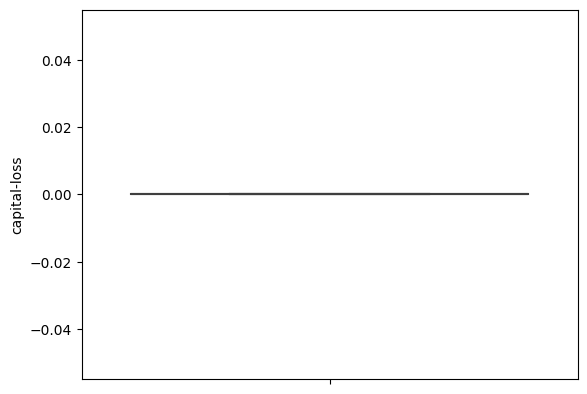

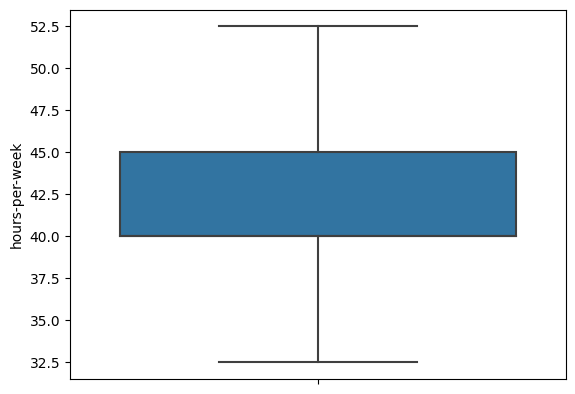

In [46]:
for column in numerical_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, 
                          np.where(df[column] > upper_bound, upper_bound, df[column]))

for column in numerical_cols:
    sns.boxplot(y=df[column])
    plt.show()


# Sayısal ve Kategorik Değişken Analizi 

### Sayısal Değişkenlerin Dağılımının İncelenmesi (Histogram ve Kernel Density Estimation - KDE)
Bu adımda, sayısal değişkenlerin dağılımını daha iyi anlayabilmek için her bir sayısal sütun için histogram ve Kernel Density Estimation (KDE) grafikleri oluşturulmuştur. Histogram, veri setindeki her bir sayısal değerin frekansını gösterirken, KDE ise verilerin sürekli bir dağılımını tahmin eden ve daha yumuşak bir eğri çizen bir tekniktir.

Bu grafiklerin oluşturulmasındaki amaç, verinin normal dağılıma ne kadar yakın olduğunu, hangi bölgelerde yoğunlaştığını ve olası simetrik veya çarpık dağılım durumlarını gözlemlemektir. KDE eğrisi, bu dağılımı daha net bir şekilde görselleştirir.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


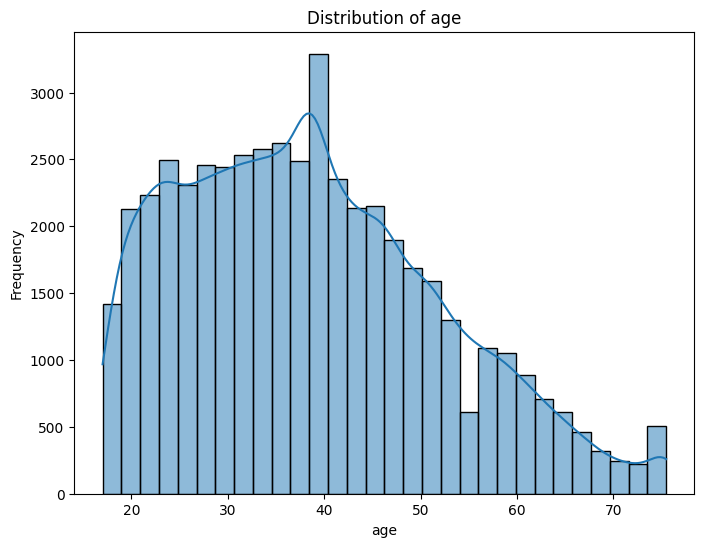

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


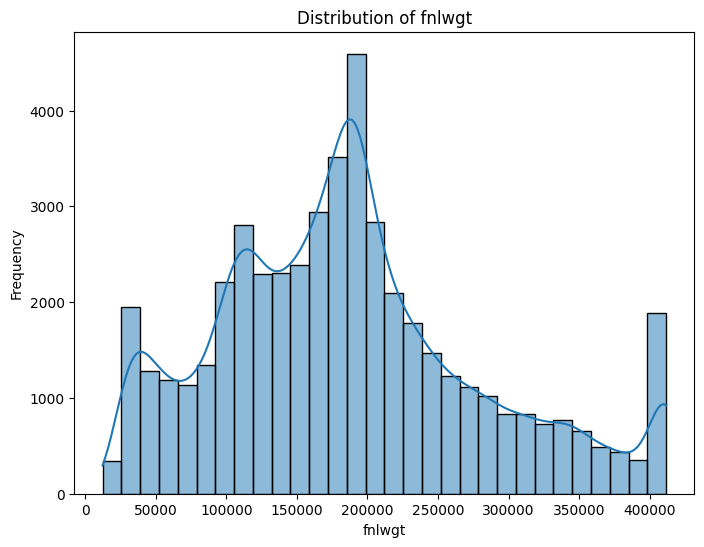

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


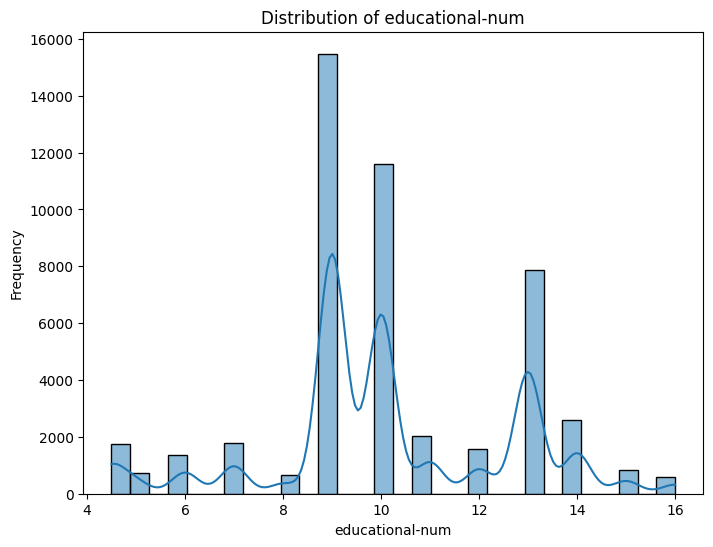

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


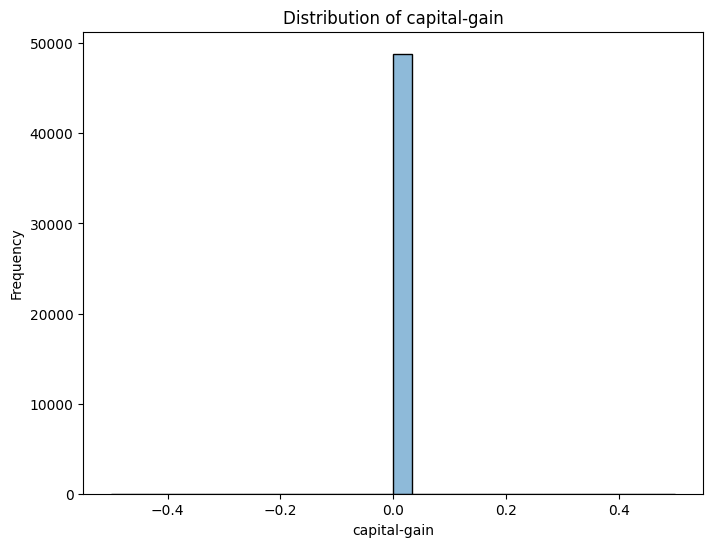

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


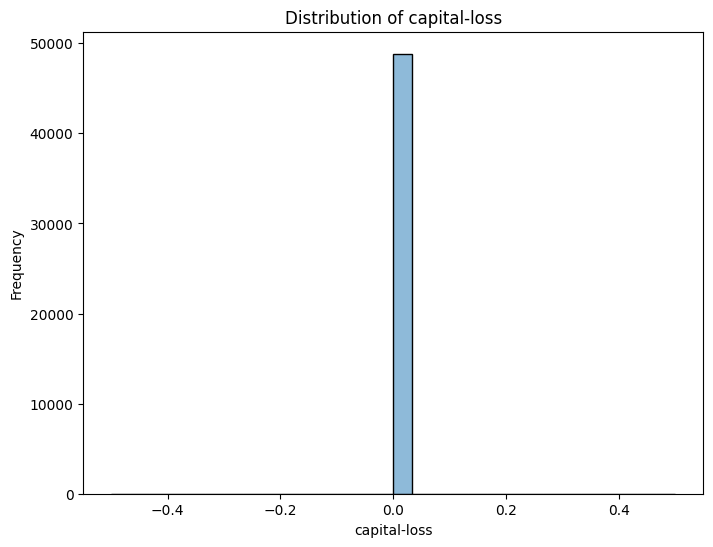

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


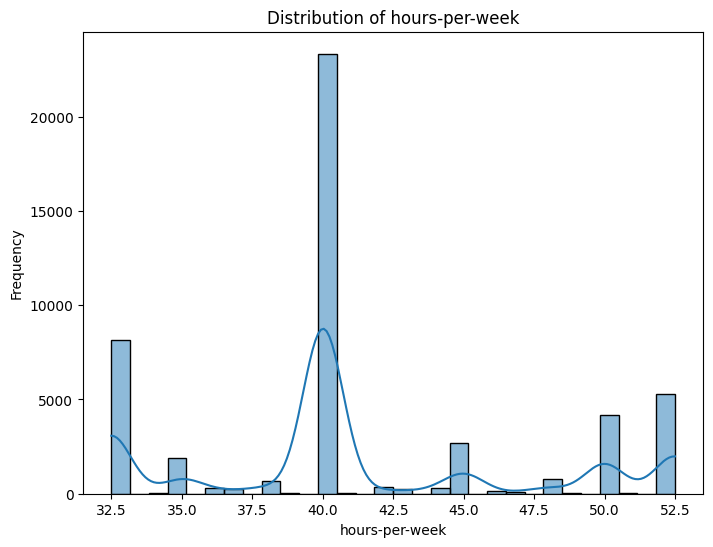

In [47]:
for column in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, bins=30)  
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Kategorik Değişkenlerin Görselleştirilmesi ve İlişkilerin İncelenmesi (Countplot)
Bu adımda, kategorik değişkenlerin dağılımlarını ve diğer değişkenlerle olan ilişkilerini incelemek amacıyla **countplot** kullanılmıştır. **Countplot**, belirli bir kategorik değişkenin her bir kategorisinin frekansını görsel olarak gösterir ve aynı zamanda bu frekansları farklı bir kategorik değişken ile karşılaştırmamıza olanak tanır.

- İlk olarak **'workclass'** değişkeni ile **'income'** değişkeni arasındaki ilişki incelenmiştir. Bu grafikte, her iş sınıfı için düşük gelir (<=50K) ve yüksek gelir (>50K) kategorilerindeki bireylerin sayıları karşılaştırılmıştır.
- İkinci grafikte **'gender'** değişkeni ve **'income'** arasındaki ilişki gösterilmiştir. Burada erkek ve kadınlar arasındaki gelir dağılımı incelenmiştir.
- Üçüncü grafikte ise **'relationship'** değişkeni ile **'marital-status'** (medeni durum) arasındaki ilişki ele alınmıştır.

Her üç grafik için de, kategoriler arasındaki farkların daha iyi gözlemlenebilmesi adına **xticks** parametresi ile x-ekseni etiketleri dikey konumlandırılmıştır.


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Local-gov'),
  Text(2, 0, 'Self-emp-not-inc'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'State-gov'),
  Text(5, 0, 'Self-emp-inc'),
  Text(6, 0, 'Without-pay'),
  Text(7, 0, 'Never-worked')])

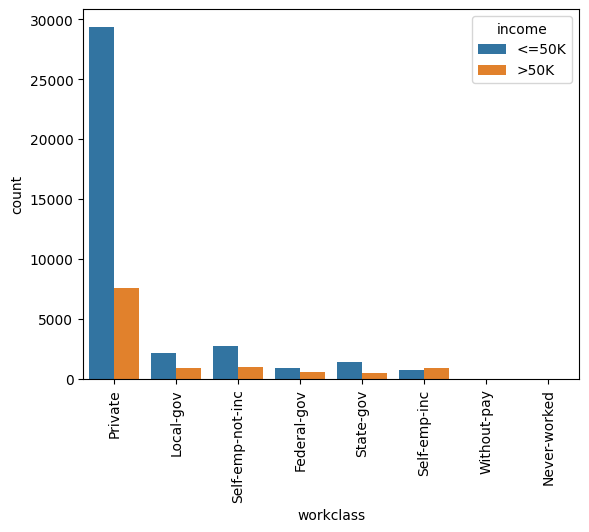

In [56]:
sns.countplot(data=df,x='workclass',hue='income')
plt.xticks(rotation='vertical')

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

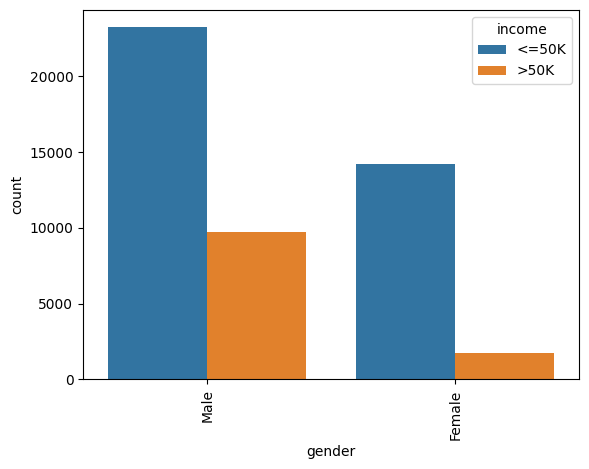

In [48]:
sns.countplot(data=df,x='gender',hue='income')
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Own-child'),
  Text(1, 0, 'Husband'),
  Text(2, 0, 'Not-in-family'),
  Text(3, 0, 'Unmarried'),
  Text(4, 0, 'Wife'),
  Text(5, 0, 'Other-relative')])

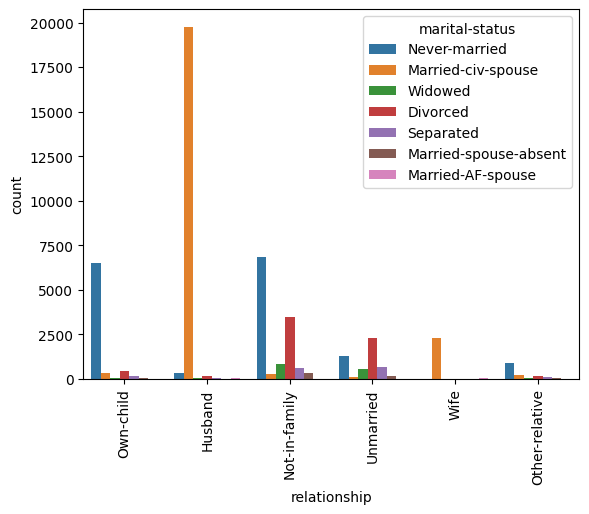

In [50]:
sns.countplot(data=df,x='relationship',hue='marital-status')
plt.xticks(rotation='vertical')

# Feature Engineering

### Özellik Seçimi ve Kategorik Değişkenlerin Kodlanması
Bu adımda, modelin daha etkili hale gelmesi için özellik seçimi ve kategorik değişkenlerin sayısal verilere dönüştürülmesi işlemleri yapılmıştır.

1. **Kategorik Değişkenlerin Kodlanması:** 
   - **LabelEncoder** kullanılarak, `df` veri setindeki tüm kategorik (object tipi) değişkenler sayısal verilere dönüştürülmüştür. Böylece kategorik değişkenler, makine öğrenmesi modelleri için uygun hale getirilmiştir.

2. **Özellik Seçimi (Feature Selection):**
   - **SelectKBest** yöntemi ve **chi-square** testi kullanılarak en iyi 10 özelliğin seçilmesi işlemi yapılmıştır. Bu adım, bağımlı değişken (`income`) ile en güçlü ilişkisi olan özelliklerin belirlenmesini sağlar.
   - Seçilen 10 özellik `selected_features` değişkeninde saklanmış ve kullanıcıya sunulmuştur.

3. **Yeni Kategorik Özellik Eklenmesi:**
   - **'hours-per-week'** değişkeni, belirli aralıklara bölünerek (`pd.cut`) **'hours_category'** adında yeni bir kategorik değişken oluşturulmuştur. Bu değişken, bireylerin çalışma saatlerine göre dört kategoriye ayrılmıştır:
     - **Az Çalışıyor**: 0-20 saat
     - **Ortalama**: 20-40 saat
     - **Çok Çalışıyor**: 40-60 saat
     - **Aşırı Çalışıyor**: 60-100 saat


In [61]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

In [62]:
df_encoded = df.copy()
for col in df.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

X = df_encoded.drop('income', axis=1)
y = df_encoded['income']
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Seçilen Özellikler:\n", selected_features)

df['hours_category'] = pd.cut(df['hours-per-week'], bins=[0, 20, 40, 60, 100], 
                              labels=['Az Çalışıyor', 'Ortalama', 'Çok Çalışıyor', 'Aşırı Çalışıyor'])


Seçilen Özellikler:
 Index(['age', 'fnlwgt', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'hours-per-week', 'native-country'],
      dtype='object')


In [63]:
df.head(3)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,hours_category
0,25.0,Private,226802.000000,10.078673,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,Ortalama
1,38.0,Private,89814.000000,9.000000,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K,Çok Çalışıyor
2,28.0,Local-gov,189631.821781,12.000000,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,Ortalama


### Sayısal Değişkenler Arasındaki Korelasyon Analizi
Bu adımda, sayısal değişkenler arasındaki korelasyon ilişkisi görselleştirilmiştir.

- **Korelasyon Isı Haritası (Heatmap):** 
  - `age`, `fnlwgt`, `educational-num`, `hours-per-week` değişkenlerinin birbirleriyle olan korelasyonları bir ısı haritası kullanılarak incelenmiştir.
  - **Seçilen Değişkenler:** Korelasyon matrisi, bu sayısal değişkenler arasındaki güçlü veya zayıf ilişkileri analiz etmeye olanak tanır.
  - **Isı Haritası:** Renk tonları, değişkenler arasındaki pozitif veya negatif korelasyonları ifade eder. Pozitif korelasyonlar kırmızı, negatif korelasyonlar ise mavi tonlarıyla temsil edilmiştir.

- **Çıktıdaki Önemli Bulgular:**
  - **`age` ve `hours-per-week` arasında güçlü bir negatif ilişki** olduğu gözlemlenmiştir. Bu, yaş ilerledikçe haftalık çalışma saatlerinin azalabileceğini göstermektedir. 
  - Bu bulgu, demografik ve mesleki özelliklerin çalışma saatlerine etkisi hakkında fikir verebilir ve daha derinlemesine analizler için önemli bir başlangıç noktasıdır.

Bu analiz, değişkenler arasındaki ilişkilerin görsel olarak anlaşılmasını sağlar ve modelleme aşamasında hangi değişkenlerin güçlü ilişkiler içerdiğini anlamaya yardımcı olur.


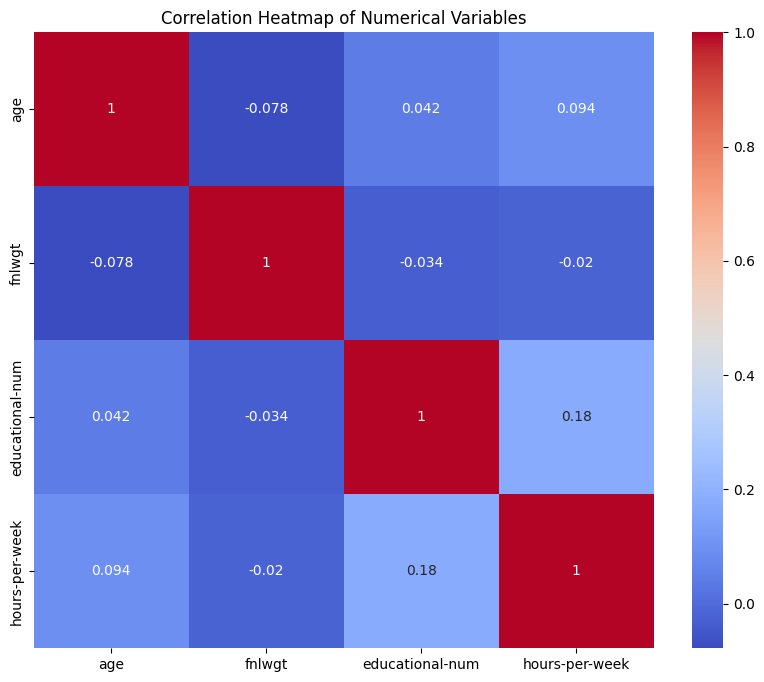

In [68]:
plt.figure(figsize = (10, 8))
sns.heatmap(df[['age', 'fnlwgt', 'educational-num',
       'hours-per-week']].corr(), annot = True, cmap = "coolwarm")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

### Kategorik Verilerin Kodlanması (Label Encoding)
Bu adımda, kategorik değişkenler modelleme için sayısal değerlere dönüştürülmüştür.

- **Kodlama Yöntemi:** 
  - `LabelEncoder` kullanılarak, her kategorik değişkene birer benzersiz sayısal değer atanmıştır.
  - **Amaç:** Makine öğrenimi algoritmalarının çalışabilmesi için kategorik verilerin sayısal formata dönüştürülmesi gerekmektedir.

- **Kodlanan Sütunlar:**
  - `gender`
  - `race`
  - `income`
  - `marital-status`
  - `native-country`
  - `workclass`

- **Kodlama Süreci:**
  - `for` döngüsüyle belirlenen sütunlar üzerinden tek tek geçilmiş ve her biri için `LabelEncoder` uygulanmıştır.
  - Sonuçlar, orijinal sütunların üzerine yazılarak DataFrame'e kaydedilmiştir.

- **Çıktı:** 
  - İlk 5 satırın gösterildiği çıktı, kodlama işleminin başarılı bir şekilde tamamlandığını doğrular.
 


In [72]:
from sklearn.preprocessing import LabelEncoder
columns=['gender','race','income','marital-status','native-country','workclass']
encoder=LabelEncoder()
for i in columns:
  df[i]=encoder.fit_transform(df[i])
df.head()


,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,hours_category
0,25.0,3,226802.000000,10.078673,4,Machine-op-inspct,Own-child,2,1,0.0,0.0,40.0,38,0,Ortalama
1,38.0,3,89814.000000,9.000000,2,Farming-fishing,Husband,4,1,0.0,0.0,50.0,38,0,Çok Çalışıyor
2,28.0,1,189631.821781,12.000000,2,Protective-serv,Husband,4,1,0.0,0.0,40.0,38,1,Ortalama
3,44.0,3,160323.000000,10.000000,2,Machine-op-inspct,Husband,2,1,0.0,0.0,40.0,38,1,Ortalama
4,18.0,3,103497.000000,10.000000,4,Prof-specialty,Own-child,4,0,0.0,0.0,32.5,38,0,Ortalama


### Kategorik Verilerin One-Hot Encoding ile Kodlanması

Bu adımda, bazı kategorik değişkenler **One-Hot Encoding** yöntemiyle kodlanmıştır. 

- **Kodlanan Sütunlar:**
  - `occupation`
  - `relationship`
  - `hours_category`

- **Yöntem:**
  - `pd.get_dummies()` fonksiyonu kullanılarak, her kategori için ayrı bir sütun oluşturulmuştur.
  - Her sütun, ilgili kategoriye ait gözlemlerin 1 (var) veya 0 (yok) değerlerini içerir.

- **Amaç:**
  - Modelin kategorik değişkenlerin etkilerini daha iyi anlayabilmesi için bu değişkenlerin ayrıştırılması.
  - Özellikle ağaç tabanlı modeller dışındaki algoritmalarda, kategorik verilerin bu şekilde kodlanması genellikle daha iyi performans sağlar.

- **Sonuç:**
  - Kodlama işlemi sonucunda, seçilen sütunların her bir kategorisi için yeni sütunlar eklenmiş ve orijinal sütunlar kaldırılmıştır.
  - Çıktıda ilk 5 satır gösterilerek işlem doğrulanmıştır.


In [74]:
columns=['occupation','relationship','hours_category']
df=pd.get_dummies(df,columns)
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,race,gender,capital-gain,capital-loss,hours-per-week,...,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,hours_category_Az Çalışıyor,hours_category_Ortalama,hours_category_Çok Çalışıyor,hours_category_Aşırı Çalışıyor
0,25.0,3,226802.000000,10.078673,4,2,1,0.0,0.0,40.0,...,False,False,False,True,False,False,False,True,False,False
1,38.0,3,89814.000000,9.000000,2,4,1,0.0,0.0,50.0,...,True,False,False,False,False,False,False,False,True,False
2,28.0,1,189631.821781,12.000000,2,4,1,0.0,0.0,40.0,...,True,False,False,False,False,False,False,True,False,False
3,44.0,3,160323.000000,10.000000,2,2,1,0.0,0.0,40.0,...,True,False,False,False,False,False,False,True,False,False
4,18.0,3,103497.000000,10.000000,4,4,0,0.0,0.0,32.5,...,False,False,False,True,False,False,False,True,False,False


### Kullanılmayan Değişkenlerin Kaldırılması ve Isı Haritası ile Korelasyon Analizi

Bu adımda, veri setinden bazı sütunlar kaldırılmış ve ardından kalan değişkenler arasındaki korelasyonlar ısı haritası ile görselleştirilmiştir.

- **Kaldırılan Sütunlar:**
  - `capital-gain`
  - `capital-loss`
  - `hours_category_Az Çalışıyor`
  
- **Sebep:**
  - Bu sütunlar, ısı haritasındaki görsel karmaşıklığı azaltmak amacıyla kaldırılmıştır.

- **Isı Haritası:**
  - Kalan sütunlar arasındaki korelasyonları incelemek için `sns.heatmap()` kullanılmıştır.
  - Görsel, veriler arasında hangi değişkenlerin güçlü pozitif ya da negatif ilişkilere sahip olduğunu kolayca anlamayı sağlar.

- **Sonuç:**
  - Temizlenen veri seti ile daha anlamlı bir korelasyon analizi gerçekleştirilmiştir.
  - Korelasyon matrisinde gözlemlenen ilişkiler, modelleme ve veri yorumlama süreçlerinde yol gösterici olacaktır.


<Axes: >

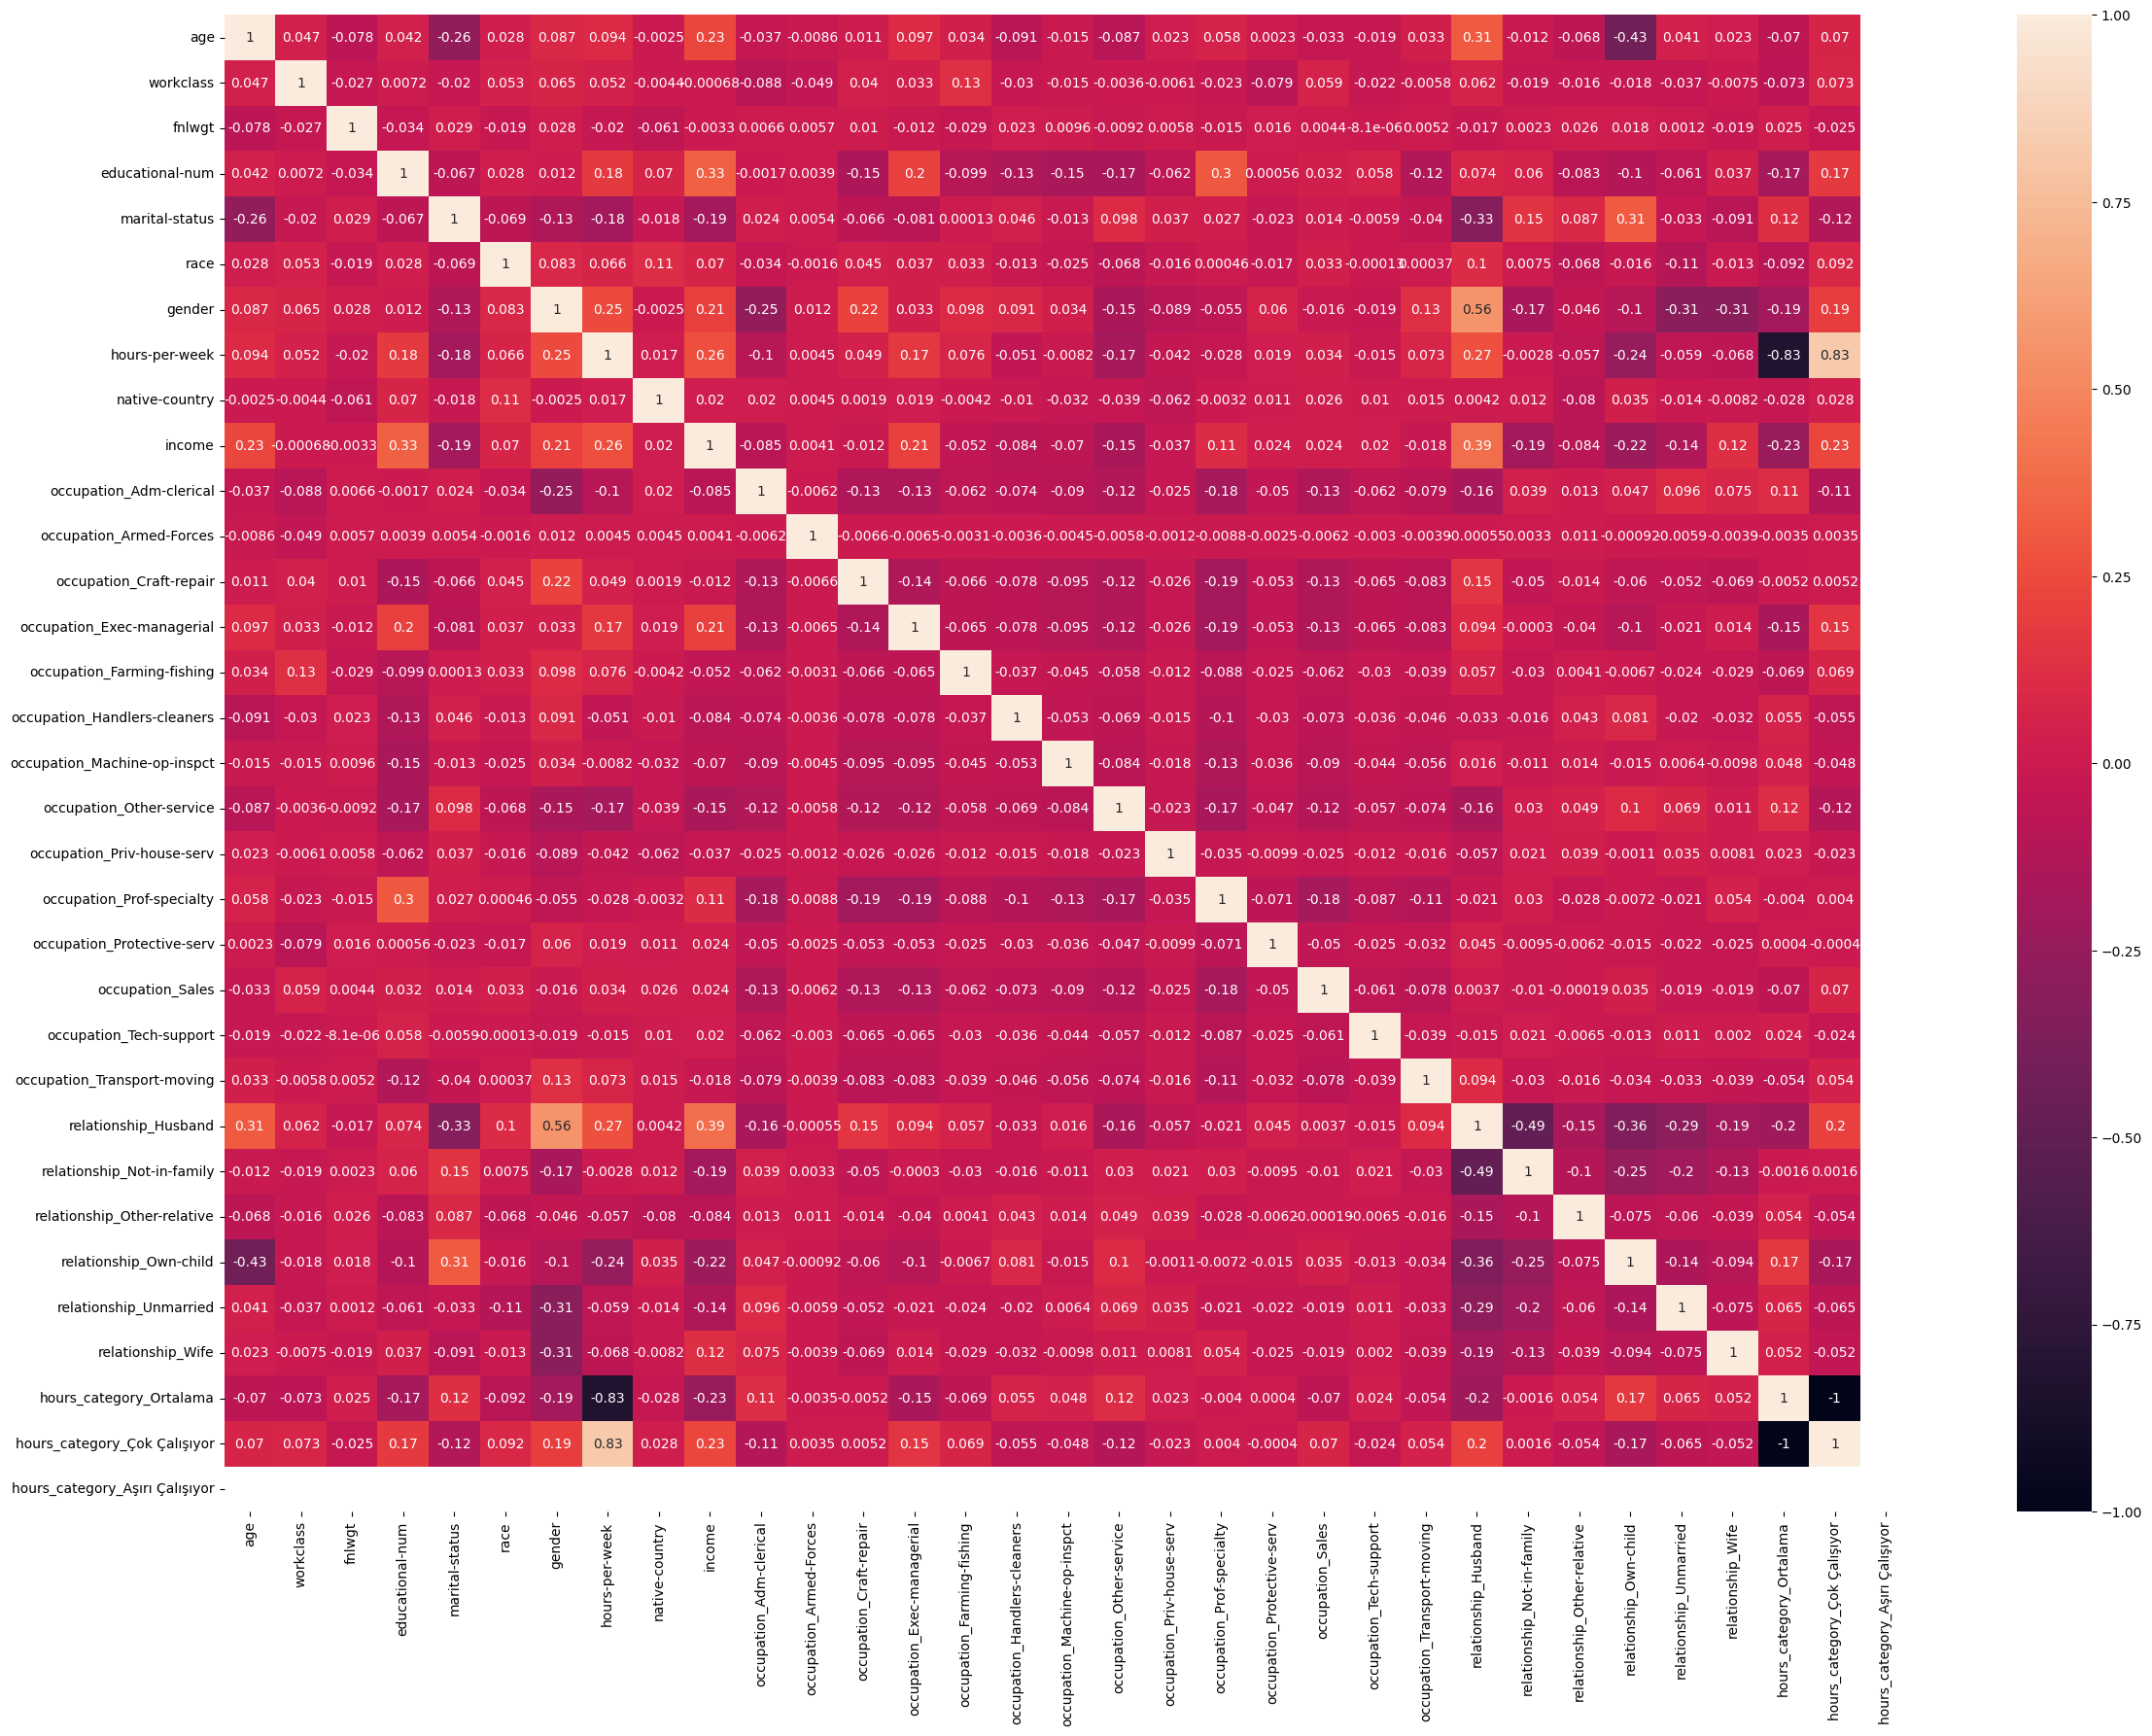

In [77]:
df = df.drop(columns=['capital-gain', 'capital-loss', 'hours_category_Az Çalışıyor'])
df.corr()
fig,ax=plt.subplots(figsize=(28,20))
sns.heatmap(df.corr(),annot=True)

### Analiz Sonuçları

**Genel Bulgular:**
   - Erkeklerin kadınlara kıyasla daha fazla saat çalıştığı, ancak gelir durumları arasında net bir fark olmadığı gözlemlenmiştir.
   - Gelir düzeyi `>50K` olan bireylerin ortalama çalışma saatlerinin, daha düşük gelir düzeyine sahip bireylerden fazla olduğu tespit edilmiştir.
   - Özellikle `age` ve `hours-per-week` değişkenleri arasında güçlü bir negatif ilişki olduğu gözlemlenmiştir.
   - Bu durum, yaş ilerledikçe haftalık çalışma saatlerinin azaldığını göstermektedir.
   
Bu sonuçlar, veri setindeki ilişkiyi daha iyi anlamak ve modelleme sürecinde daha anlamlı girdiler oluşturmak için bir temel sağlamaktadır.
